# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [133]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [134]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

count = 0
sets = 1

found_cities = []
latitudes = []
longitudes = []
temp_max = []
humidity=[]
clouds =[]
wind_speeds=[]
country= []
dates = [] 

print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url+ city).json()
      
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        found_cities.append(city)
      
        if count >49:
            count = 1
            sets +=1
            
        else:
            count +=1
        print(f" Processing Record {count} of Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")

print("------------------------------------------------")
print(" Complete")
print("------------------------------------------------")

-----------------------------
 Processing Record 1 of Set 1 | omboue
 Processing Record 2 of Set 1 | saint anthony
 Processing Record 3 of Set 1 | beloha
 Processing Record 4 of Set 1 | ribeira grande
 Processing Record 5 of Set 1 | sorland
 Processing Record 6 of Set 1 | carnarvon
 Processing Record 7 of Set 1 | hobart
City not found. Skipping...
 Processing Record 8 of Set 1 | ahuimanu
City not found. Skipping...
 Processing Record 9 of Set 1 | mayumba
 Processing Record 10 of Set 1 | somerton
 Processing Record 11 of Set 1 | ocumare del tuy
City not found. Skipping...
 Processing Record 12 of Set 1 | talnakh
 Processing Record 13 of Set 1 | sao felix do xingu
 Processing Record 14 of Set 1 | vestmannaeyjar
 Processing Record 15 of Set 1 | chuy
 Processing Record 16 of Set 1 | port augusta
 Processing Record 17 of Set 1 | karpogory
 Processing Record 18 of Set 1 | punta arenas
 Processing Record 19 of Set 1 | hilo
 Processing Record 20 of Set 1 | vanimo
 Processing Record 21 of Set 1

 Processing Record 31 of Set 4 | camacupa
 Processing Record 32 of Set 4 | hamilton
 Processing Record 33 of Set 4 | egvekinot
 Processing Record 34 of Set 4 | klaksvik
 Processing Record 35 of Set 4 | leshukonskoye
 Processing Record 36 of Set 4 | sept-iles
 Processing Record 37 of Set 4 | elizabeth city
 Processing Record 38 of Set 4 | ust-uda
 Processing Record 39 of Set 4 | esperance
 Processing Record 40 of Set 4 | narsaq
 Processing Record 41 of Set 4 | ostersund
 Processing Record 42 of Set 4 | bengkulu
 Processing Record 43 of Set 4 | naraina
 Processing Record 44 of Set 4 | buchanan
 Processing Record 45 of Set 4 | eskil
 Processing Record 46 of Set 4 | whitehorse
 Processing Record 47 of Set 4 | yeppoon
 Processing Record 48 of Set 4 | alta floresta
 Processing Record 49 of Set 4 | le moule
 Processing Record 50 of Set 4 | chokurdakh
City not found. Skipping...
 Processing Record 1 of Set 5 | faanui
 Processing Record 2 of Set 5 | taltal
City not found. Skipping...
 Processin

 Processing Record 20 of Set 8 | penarroya-pueblonuevo
 Processing Record 21 of Set 8 | baracoa
 Processing Record 22 of Set 8 | isabela
 Processing Record 23 of Set 8 | kavaratti
 Processing Record 24 of Set 8 | caravelas
 Processing Record 25 of Set 8 | komsomolskiy
City not found. Skipping...
 Processing Record 26 of Set 8 | kholodnyy
 Processing Record 27 of Set 8 | lithgow
 Processing Record 28 of Set 8 | korla
 Processing Record 29 of Set 8 | daru
 Processing Record 30 of Set 8 | sitka
 Processing Record 31 of Set 8 | morro bay
 Processing Record 32 of Set 8 | padang
 Processing Record 33 of Set 8 | kapuskasing
 Processing Record 34 of Set 8 | quatre cocos
 Processing Record 35 of Set 8 | shahrud
City not found. Skipping...
 Processing Record 36 of Set 8 | lalsot
 Processing Record 37 of Set 8 | poltavka
 Processing Record 38 of Set 8 | haines junction
 Processing Record 39 of Set 8 | denpasar
 Processing Record 40 of Set 8 | pudukkottai
 Processing Record 41 of Set 8 | nigde
 Pr

 Processing Record 4 of Set 12 | jibuti
 Processing Record 5 of Set 12 | murray bridge
 Processing Record 6 of Set 12 | uvat
 Processing Record 7 of Set 12 | dakar
------------------------------------------------
 Complete
------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [135]:
city_data = pd.DataFrame({"City": found_cities, "Lat": latitudes,\
                          "Lng": longitudes, "Max Temp":temp_max, "Humidity":humidity, "Cloudiness":clouds,\
                          "Wind Speed":wind_speeds, "Country":country, "Date":dates})
city_data.to_csv(output_data_file, index=False, header=True)

In [136]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,omboue,-1.5746,9.2618,74.59,79,83,8.30,GA,1629773706
1,saint anthony,45.0205,-93.2180,80.20,64,1,1.99,US,1629773120
2,beloha,-25.1667,45.0500,61.92,94,0,4.63,MG,1629773185
3,ribeira grande,38.5167,-28.7000,72.00,100,75,10.36,PT,1629773116
4,sorland,67.6670,12.6934,51.10,83,100,15.88,NO,1629773111


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [137]:
more_100_humidity = city_data.loc[city_data['Humidity']>100]
print(more_100_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [22]:
#  Get the indices of cities that have humidity over 100%.


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

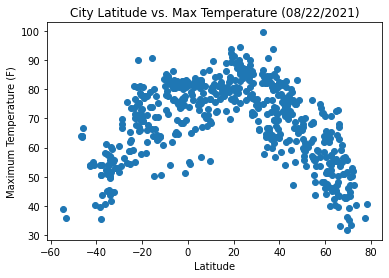

In [139]:
plt.scatter(city_data['Lat'], city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('City Latitude vs. Max Temperature (08/22/2021)')
plt.savefig('../output_data/fig1.png')
plt.show()

## Latitude vs. Humidity Plot

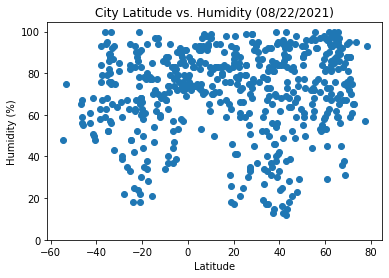

In [140]:
plt.scatter(city_data['Lat'], city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (08/22/2021)')
plt.savefig('../output_data/fig2.png')
plt.yticks([ 0, 20,40,60,80,100])

plt.show()

## Latitude vs. Cloudiness Plot

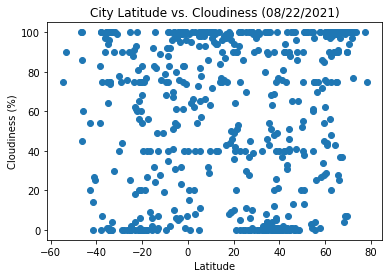

In [141]:

plt.scatter(city_data['Lat'], city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (08/22/2021)")
plt.savefig('../output_data/fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

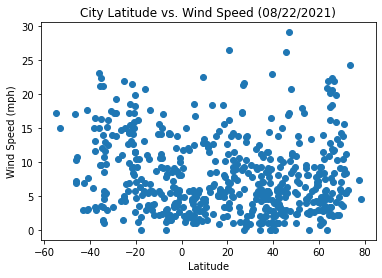

In [142]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (08/22/2021)")
plt.savefig('../output_data/fig4.png')
plt.show()

## Linear Regression

In [145]:
#make northern and southern hemisphere variables
north= city_data['Lat']>0
south = city_data['Lat']<0
north_hemisphere=city_data[north]
south_hemisphere=city_data[south]
print(north_hemisphere)

               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1     saint anthony  45.0205  -93.2180     80.20        64           1   
3    ribeira grande  38.5167  -28.7000     72.00       100          75   
4           sorland  67.6670   12.6934     51.10        83         100   
7          ahuimanu  21.4447 -157.8378     80.31        75          90   
9          somerton  32.5964 -114.7097     99.50        19           1   
..              ...      ...       ...       ...       ...         ...   
551        hurghada  27.2574   33.8129     80.64        34           0   
552      porto novo   6.4965    2.6036     78.62        93         100   
553          jibuti  11.5000   42.5000     81.81        50          95   
555            uvat  59.1433   68.8953     71.98        53          34   
556           dakar  14.6937  -17.4441     79.68        79          96   

     Wind Speed Country        Date  
1          1.99      US  1629773120  
3         10.36      PT  1629773116

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

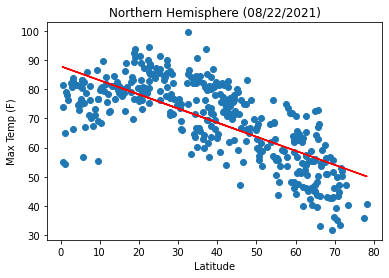

The r-value is : 0.5120149229721094


In [146]:
x_values_north = north_hemisphere['Lat']
y_values_north_temp = north_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north_temp)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_temp)
plt.plot(x_values_north, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

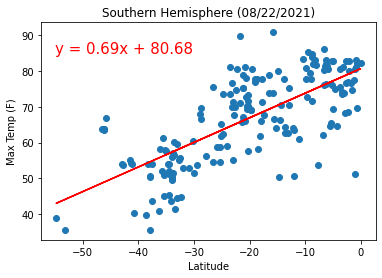

The r-value is : 0.5196108031380609


In [147]:
x_values_south = south_hemisphere['Lat']
y_values_south_temp = south_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south , y_values_south_temp)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_temp)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-55,85), fontsize=15, color = 'red')
plt.title("Southern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

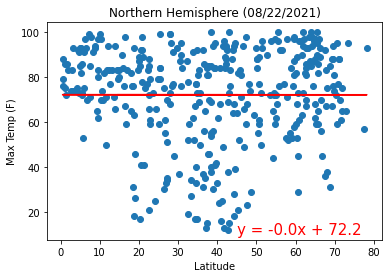

The r-value is : 1.1928018883076244e-07


In [148]:
y_values_north_humid = north_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_north, y_values_north_humid)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_humid)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color = 'red')
plt.title("Northern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

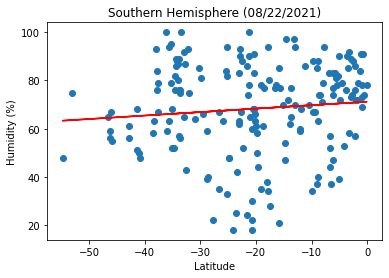

The r-value is : 0.009715865024192317


In [149]:
y_values_south_humid = south_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_south , y_values_south_humid)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_humid)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color = 'red')
plt.title("Southern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

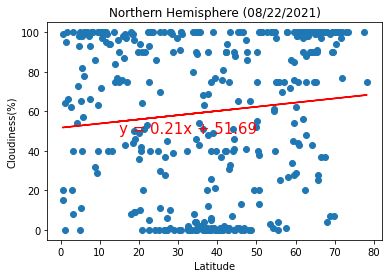

The r-value is : 0.012520245744285412


In [150]:
y_values_north_cloud = north_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_north, y_values_north_cloud)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_cloud)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (15, 49), fontsize=15, color = 'red')
plt.title("Northern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

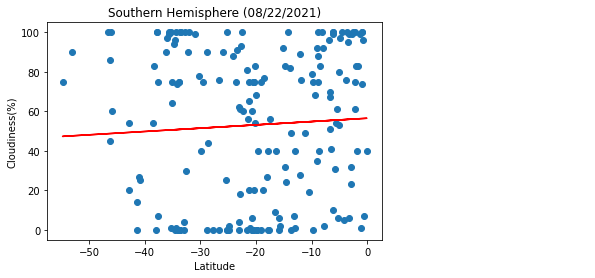

The r-value is : 0.003364634275153477


In [151]:
y_values_south_cloud = south_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_south, y_values_south_cloud)
regress_values = x_values_south *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south, y_values_south_cloud)
plt.plot(x_values_south, regress_values, "r-")
plt.annotate(line_eq, (15, 49), fontsize=15, color = 'red')
plt.title("Southern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

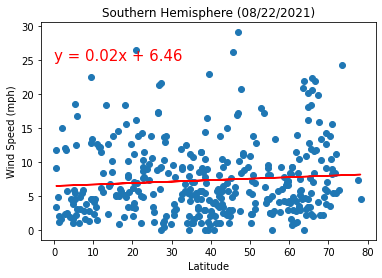

The r-value is : 0.006700527963175214


In [152]:
y_values_north_wind = north_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_north, y_values_north_wind)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_wind)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (0, 25), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

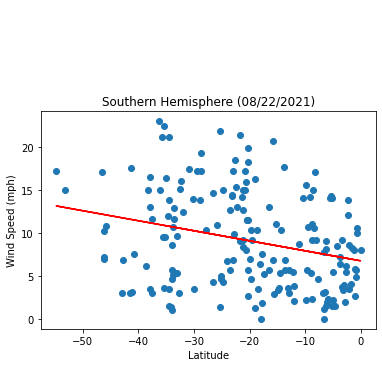

The r-value is : 0.07499870721139151


In [153]:

y_values_south_wind = south_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_south , y_values_south_wind)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_wind)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-25, 35), fontsize=15, color = 'red')
plt.title("Southern Hemisphere (08/22/2021)")
plt.savefig('../output_data/fig5.png')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is : {rvalue**2}")